In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
# Đọc dữ liệu
df=pd.read_csv('/content/drive/MyDrive/for jobs/GG Colab/Project/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


## Scatter plot
*   X = Year
*   Y = Adjusted sea level
*   plt.scatter(X, Y)
*   x_label, y_label



<Figure size 640x480 with 0 Axes>

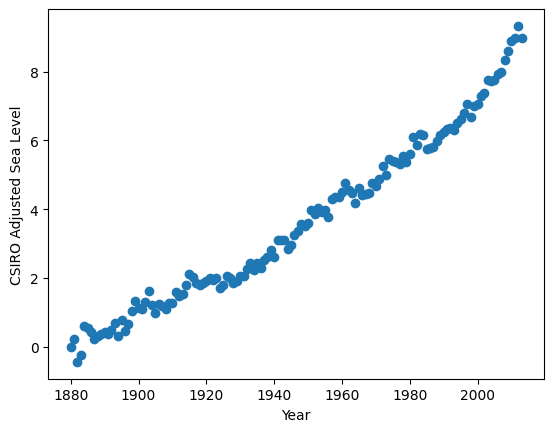

In [ ]:
# Biểu đồ phân tán, X = Year, Y = CSIRO Adjusted Sea Level
plt.clf() # clear figure dùng để xóa biểu đồ hiện tại nếu có để khi vẽ lên không bị chồng lấn
fig, ax = plt.subplots() # tạo figure để vẽ
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
ax.set_xlabel('Year') # hoặc plt.x_label...., axes không có x_label mà phải sử dụng set_xlabel
ax.set_ylabel('CSIRO Adjusted Sea Level') # hoặc plt.y_label...., axes không có y_label mà phải sử dụng set_ylabel
plt.show() # muốn show phải dùng plt hoặc không code show()

## Sử dụng linregress from scipy.stats để lấy độ dốc và giao điểm y của đường thẳng phù hợp nhất. Vẽ đường thẳng phù hợp nhất lên trên biểu đồ phân tán. Vẽ đường thẳng đi qua năm 2050 để dự đoán mực nước biển dâng vào năm 2050.

In [ ]:
res_all = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_all = pd.Series(range(int(df['Year'].min()), 2051))
y_all = res_all.slope * x_all + res_all.intercept
ax.plot(x_all, y_all)
plt.show()

<Figure size 640x480 with 0 Axes>

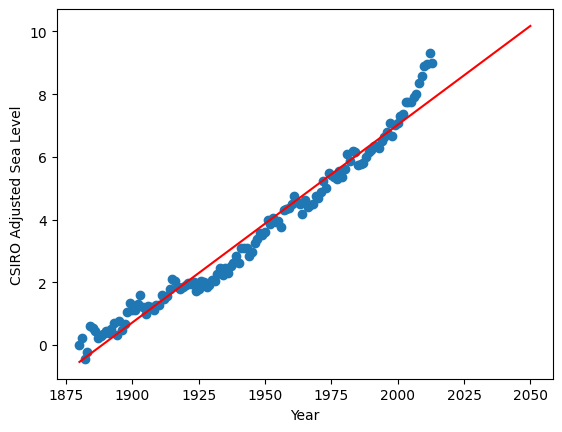

In [ ]:
plt.clf()
fig, ax = plt.subplots()

# Vẽ scatter
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Linear regression
res_all = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_all = pd.Series(range(int(df['Year'].min()), 2051))
y_all = res_all.slope * x_all + res_all.intercept

# Vẽ đường hồi quy
ax.plot(x_all, y_all, color='red')

# Nhãn trục
ax.set_xlabel('Year')
ax.set_ylabel('CSIRO Adjusted Sea Level')

plt.show()


## Vẽ một đường thẳng mới phù hợp nhất chỉ sử dụng dữ liệu từ năm 2000 đến năm gần nhất trong tập dữ liệu. Đường thẳng này cũng đi qua năm 2050 để dự đoán mực nước biển dâng vào năm 2050 nếu tốc độ dâng tiếp tục như năm 2000.

In [23]:
df_2000 = df[df['Year'] >= 2000]
res_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
x_2000 = pd.Series(range(2000, 2051))
y_2000 = res_2000.slope * x_2000 + res_2000.intercept
ax.plot(x_2000, y_2000)

<Figure size 640x480 with 0 Axes>

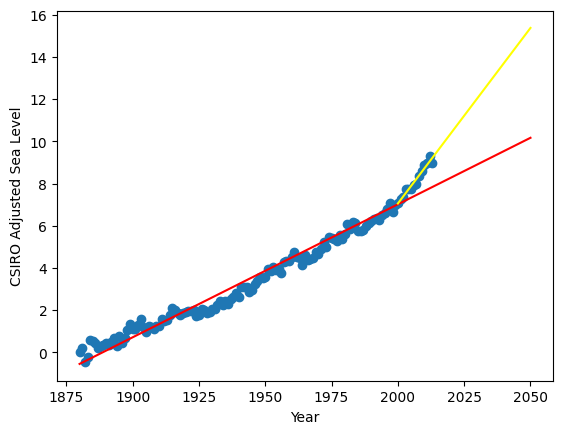

In [25]:
plt.clf()
fig, ax = plt.subplots()

# Vẽ scatter
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Linear regression
res_all = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_all = pd.Series(range(int(df['Year'].min()), 2051))
y_all = res_all.slope * x_all + res_all.intercept

# Vẽ đường hồi quy
ax.plot(x_all, y_all, color='red')

# Vẽ đường thứ 2
df_2000 = df[df['Year'] >= 2000]
res_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
x_2000 = pd.Series(range(2000, 2051))
y_2000 = res_2000.slope * x_2000 + res_2000.intercept
ax.plot(x_2000, y_2000, color = 'yellow')

# Nhãn trục
ax.set_xlabel('Year')
ax.set_ylabel('CSIRO Adjusted Sea Level')

plt.show()

## Nhãn x phải là Year, nhãn y phải là Sea Level (inches), và tiêu đề phải là Rise in Sea Level.

In [26]:
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

Text(0.5, 1.0, 'Rise in Sea Level')

In [30]:
def scatter_regress():
  plt.clf()
  fig, ax = plt.subplots()
  # vẽ scatter plot
  ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

  # vẽ đường hồi quy
  res_all = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
  x_all = pd.Series(range(int(df['Year'].min()), 2051))
  y_all = res_all.slope * x_all + res_all.intercept
  ax.plot(x_all, y_all, color='red')

  # vẽ đường hồi quy 2, tính từ năm 200 trở đi
  df_2000 = df[df['Year']>=2000]
  res_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
  x_2000 = pd.Series(range(2000, 2051))
  y_2000 = res_2000.slope * x_2000 + res_2000.intercept
  ax.plot(x_2000, y_2000, color='yellow')

  # nhãn trục
  ax.set_xlabel('Year')
  ax.set_ylabel('CSIRO Adjusted Sea Level')

  # tiêu đề
  ax.set_title('Rise in Sea Level')

  return plt.gca()


<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

<Figure size 640x480 with 0 Axes>

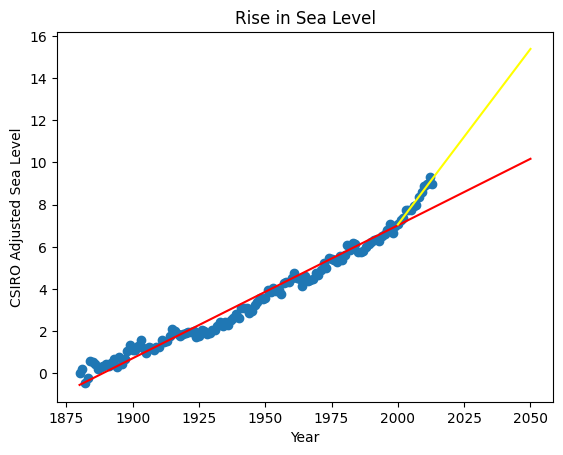

In [31]:
scatter_regress()